### This program is made to open and analyse data from a csv of data relating to my biking journeys around Amsterdam during last summer. Some basic stats are found first and following this various columns fomr the table are plotted against each other. Several graphs are created and examined for patterns. Finally a search for correlation between columns is done more mathematically using spearman's rank. This is done after choosing appropriate columns from the pairplot and filling the blank values.

In [1]:
#import necessary packages and rename as appropriate

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

from pandas import Series, DataFrame

import scipy 
from scipy import stats
from scipy.stats import spearmanr

from operator import itemgetter, attrgetter, methodcaller

In [2]:
#formatting for images and plots within the notebook
%matplotlib inline
rcParams['figure.figsize']= 18,14
sb.set_style('whitegrid')

In [3]:
#importing the data, opening the file and reading it.
address = 'C:/Users/Charlie/Documents/Bike_Journeys.csv'
biking = pd.read_csv(address)
#columns are named or renamed
biking.columns = ['Date', 'Time taken (s)', 'Time of departure', 'Distance travelled (m)', 'Average speed (m/s)', 'Temperature (°C)','Weather','Lowest point (m)', 'Highest point (m)', 'Height difference (beginning to end) (m)']
#the first few rows are displayed in order to make sure that the file has been imported correctly
biking.head()

,Date,Time taken (s),Time of departure,Distance travelled (m),Average speed (m/s),Temperature (°C),Weather,Lowest point (m),Highest point (m),Height difference (beginning to end) (m)
0,02/07/18,598.3,18:30,2896.0,4.840381,26.0,Sunny,-7.0,3.0,6.0
1,03/0718,302.7,18:37,1669.0,5.513710,23.0,sunny,-5.0,3.0,-5.0
2,NaN,261.8,19:57,843.0,3.220015,22.0,sunny,-3.0,1.0,3.0
3,NaN,582.3,23:08,2647.0,4.545767,17.0,clear,-7.0,3.0,3.0
4,04/07/18,463.3,10:16,2469.0,5.329160,19.0,sunny,-7.0,3.0,-4.0


In [15]:
#finding some basic stats
print(biking.mean())

# I was typically about 2 m below sea level
# compute the average speed in km/h
# time takine in mins +secs
#compare distance to some item laid end to end
print('Total Distance Travelled', biking['Distance travelled (m)'].sum())
#thers is a slight discrepancy for the height difference, most likely due to some missing data

Time taken (s)                               575.532484
Distance travelled (m)                      2804.836364
Average speed (m/s)                            3.571169
Temperature (°C)                              21.617450
Lowest point (m)                              -5.691176
Highest point (m)                              3.367647
Height difference (beginning to end) (m)       0.397059
dtype: float64
Total Distance Travelled 308532.0


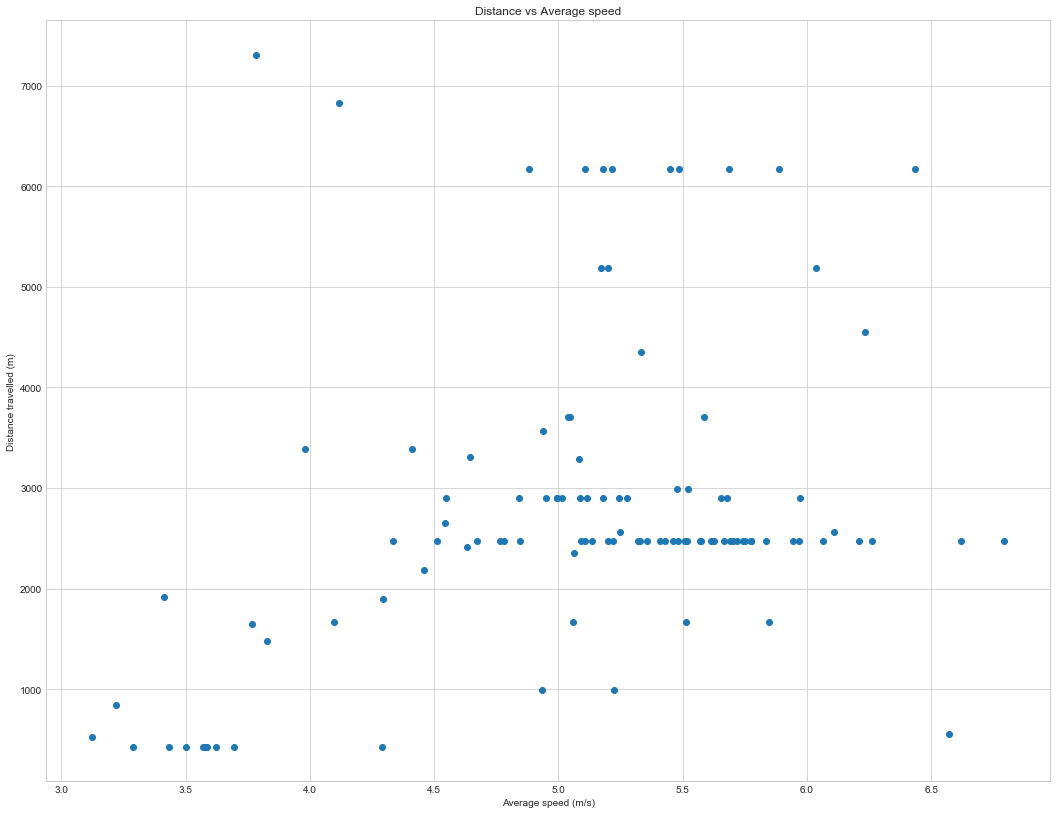

In [16]:
#A dataframe is created with two columns of the table
df = biking[['Average speed (m/s)', 'Distance travelled (m)']]
#The plot is labeled, titled, and created
plt.xlabel('Average speed (m/s)')
plt.ylabel('Distance travelled (m)')
plt.title('Distance vs Average speed')
plt.scatter(df['Average speed (m/s)'],df['Distance travelled (m)'])

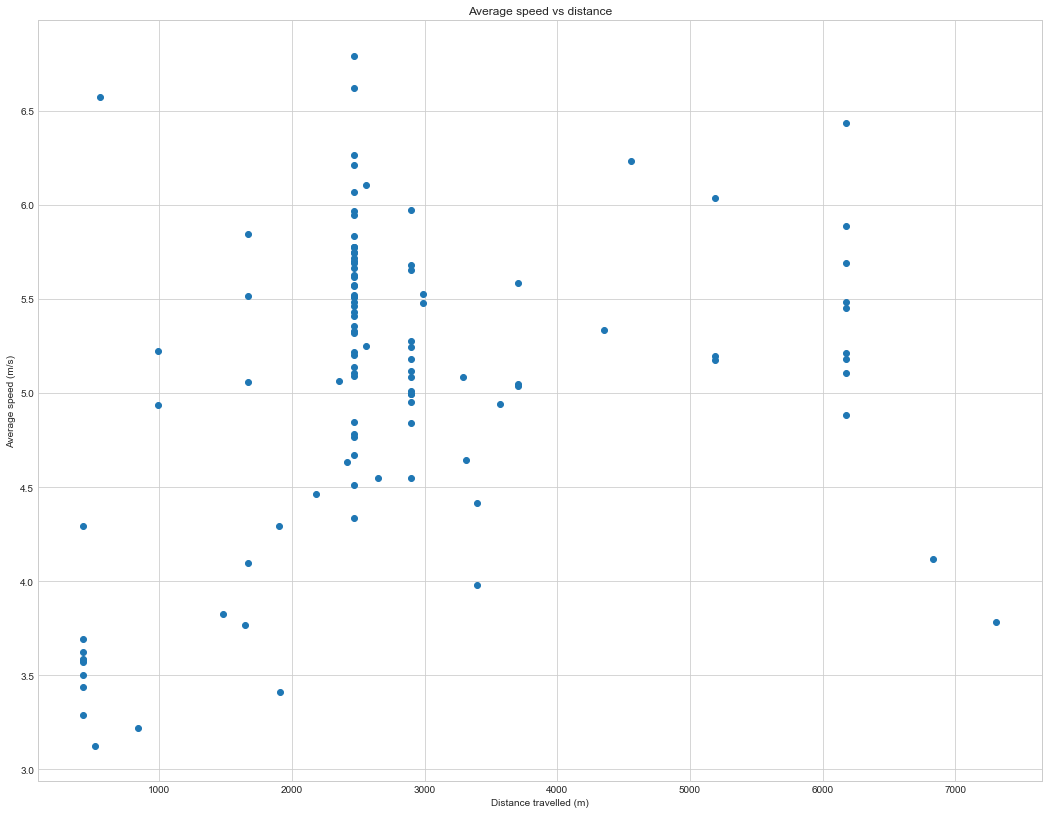

In [7]:
#flipping the plot so that speed is the y axis
fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(
    biking['Distance travelled (m)'],
    biking['Average speed (m/s)']
)
ax.set_xlabel("Distance travelled (m)")
ax.set_ylabel("Average speed (m/s)")
ax.set_title('Average speed vs distance')


plt.show()

In [4]:
#looking for further stats via the mode option, primarily weather as a 
#mean can't be created for text. Though values could be assigned to weather types
#then a mean could be calculated

#listo = pd.DataFrame({biking})

### the most common weather was sunny
mode = biking.mode()
mode.head()

,Date,Time taken (s),Time of departure,Distance travelled (m),Average speed (m/s),Temperature (°C),Weather,Lowest point (m),Highest point (m),Height difference (beginning to end) (m)
0,01/09/18,427.4,10:16,2469.0,0.0,19.0,sunny,-7.0,3.0,-4.0
1,02/07/18,579.8,10:18,NaN,NaN,22.0,NaN,NaN,NaN,NaN
2,02/09/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03/0718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04/07/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


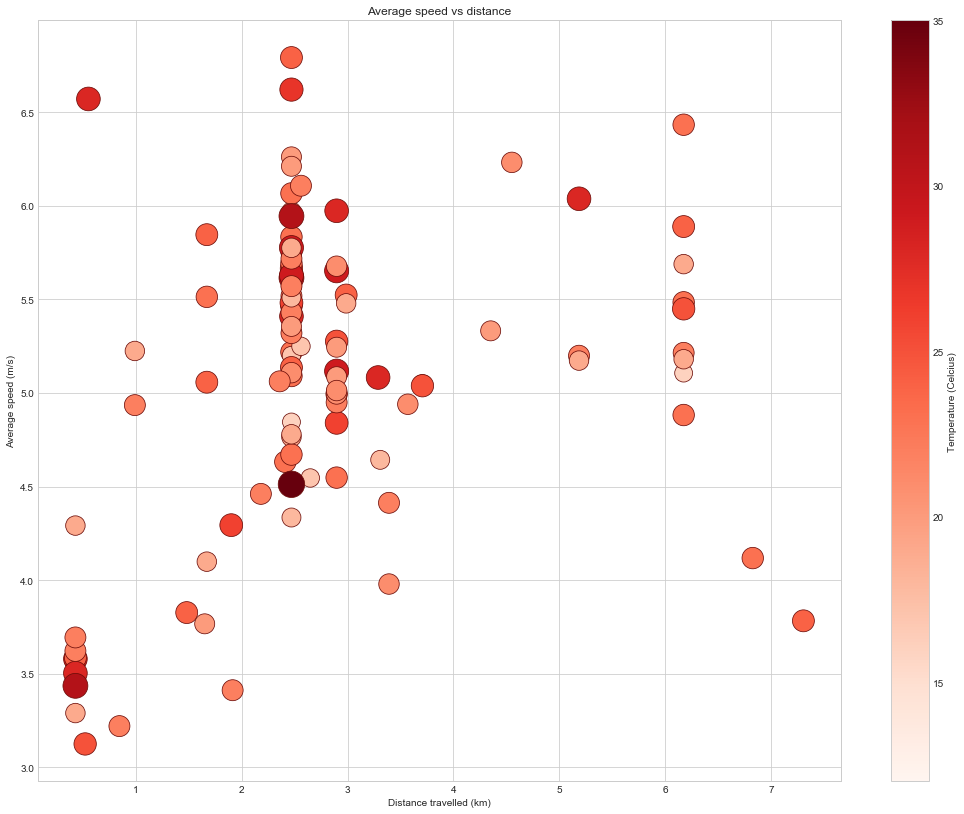

In [8]:
#A plot to show 3 different variables: speed, distance, and temperature. 
#This sort of plot can actually show 4 variables as the size of the markers 
#varies as awell, however that isn't so clear in this plot.

fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(
    biking['Distance travelled (m)']/1e3,
    biking['Average speed (m/s)'],
    s = biking['Temperature (°C)']*20,
    c = biking['Temperature (°C)'],
    cmap = plt.cm.Reds,
    vmin= biking['Temperature (°C)'].min(),
    vmax = biking['Temperature (°C)'].max(),
    edgecolor = '#6b0c08',
    linewidth=0.75
)
cbar = fig.colorbar(my_scatter_plot)
cbar.set_label('Temperature (Celcius)')
ax.set_xlabel('Distance travelled (km)')
ax.set_ylabel('Average speed (m/s)')
ax.set_title('Average speed vs distance')

plt.show()

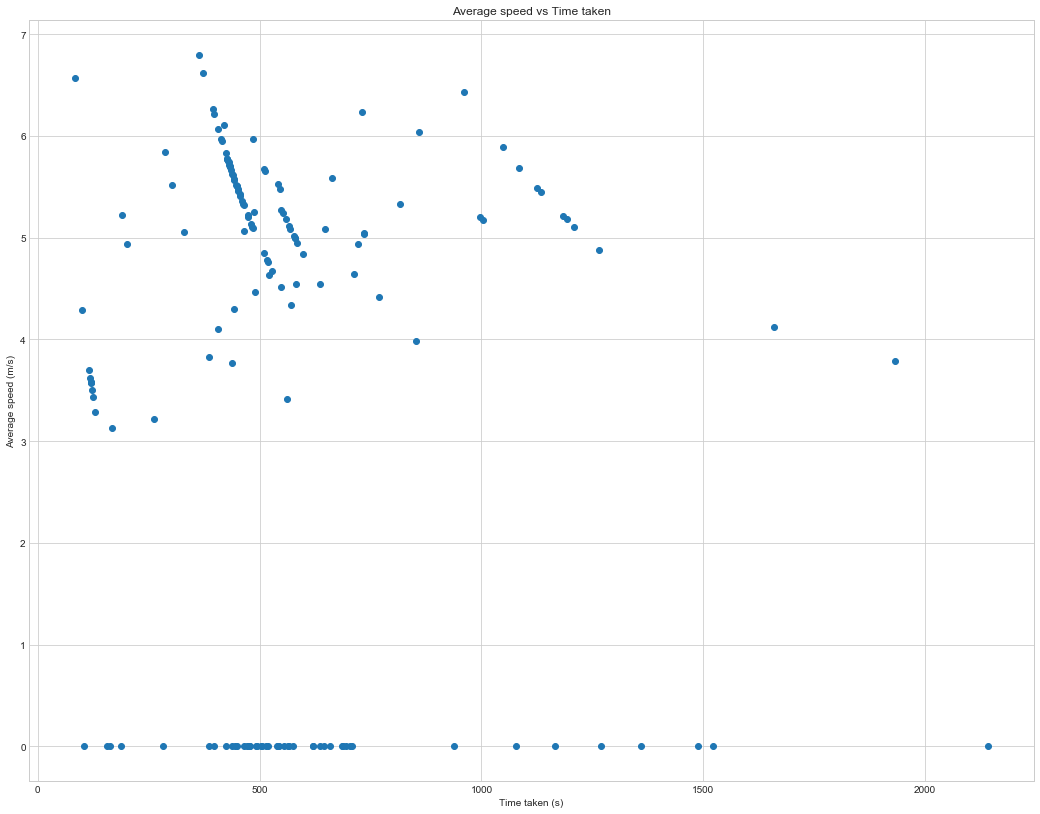

In [11]:
#A plot of speed vs time taken

fig, ax = plt.subplots()
my_scatter_plot1 = ax.scatter(
    biking['Time taken (s)'],
    biking['Average speed (m/s)']
)
ax.set_xlabel("Time taken (s)")
ax.set_ylabel("Average speed (m/s)")
ax.set_title('Average speed vs Time taken')


plt.show()

#It is easier to see here that some data is missing as there are multiple rows without a speed
#there isn't much structure to the plot apart from a few small distinctions

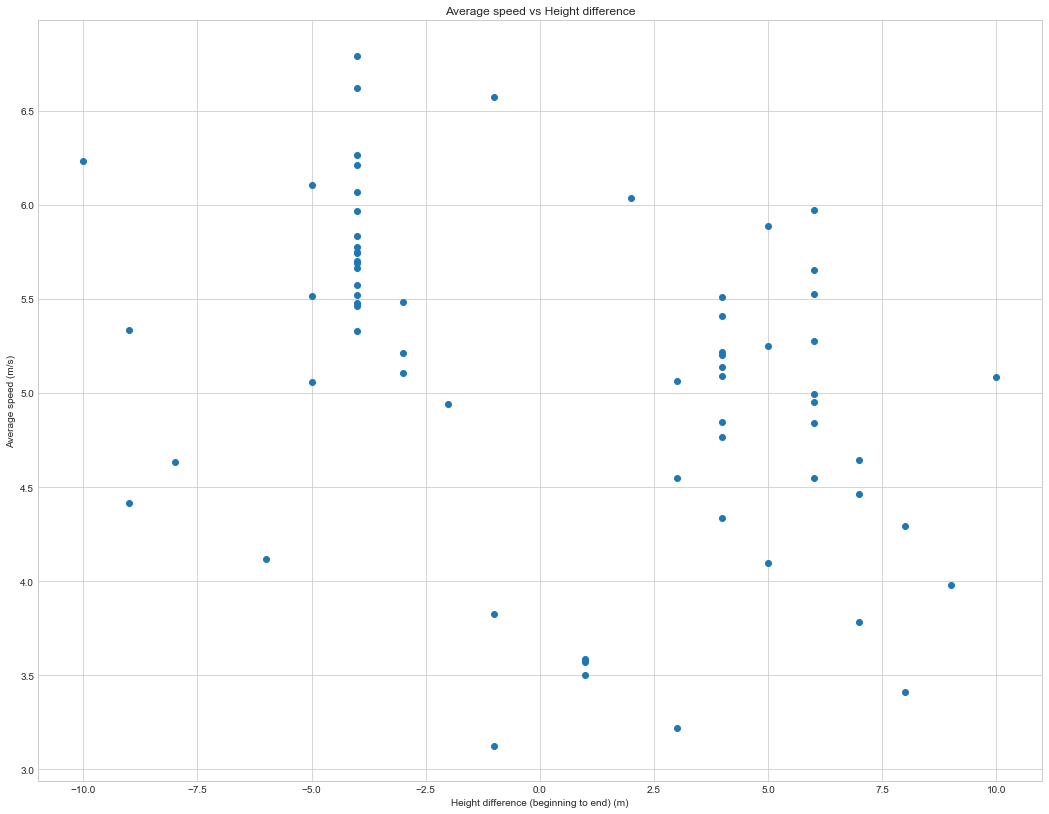

In [12]:
fig, ax = plt.subplots()
my_scatter_plot2 = ax.scatter(
    biking['Height difference (beginning to end) (m)'],
    biking['Average speed (m/s)']
)
ax.set_xlabel("Height difference (beginning to end) (m)")
ax.set_ylabel("Average speed (m/s)")
ax.set_title('Average speed vs Height difference')


plt.show()

#There are 3 vertical lines that stand out here, they can be assumed to be the same journey. 
#To find the journey to and from a location there will be a corresponding dot on the other side of 0. 
#There are lines at about +/-4m, this must be the return journey and the average speed going downhill is faster as expected.
#The most common of which were my trips to work and the gym

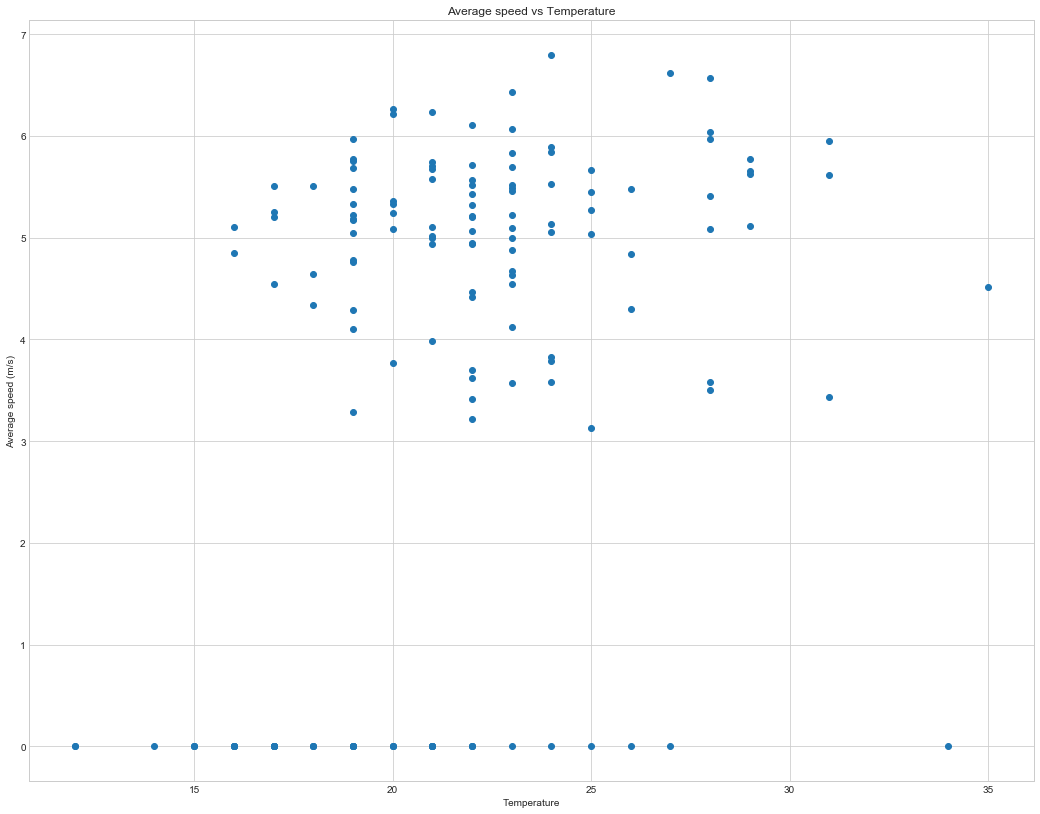

In [13]:
fig, ax = plt.subplots()
my_scatter_plot3 = ax.scatter(
    biking['Temperature (°C)'],
    biking['Average speed (m/s)']
)
ax.set_xlabel('Temperature')
ax.set_ylabel("Average speed (m/s)")
ax.set_title('Average speed vs Temperature')


plt.show()

#Somewhat of a Gaussian distribution. A better graph to make may be a bar chart
#of the average velocity for each degreee in temperature measured.

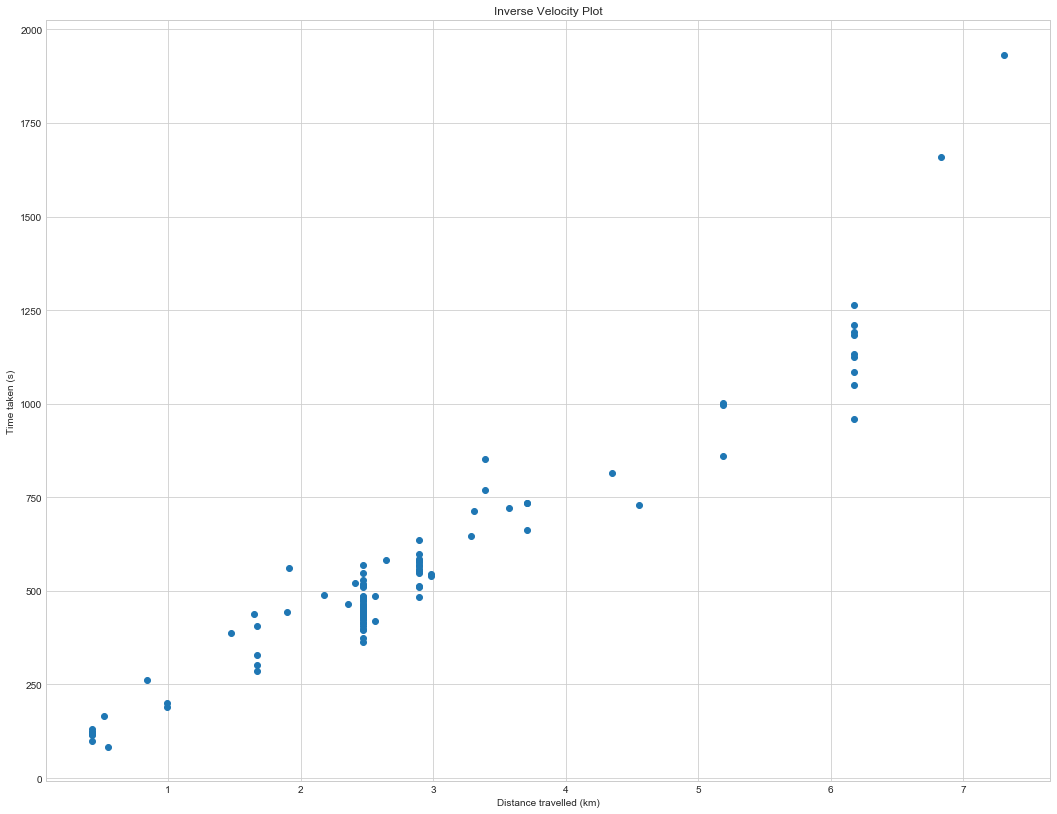

In [14]:
fig, ax = plt.subplots()
my_scatter_plot4 = ax.scatter(
    biking['Distance travelled (m)']/1e3,
    biking['Time taken (s)']
)
ax.set_xlabel('Distance travelled (km)')
ax.set_ylabel("Time taken (s)")
ax.set_title('Inverse Velocity Plot')


plt.show()
#An inverse velocity plot

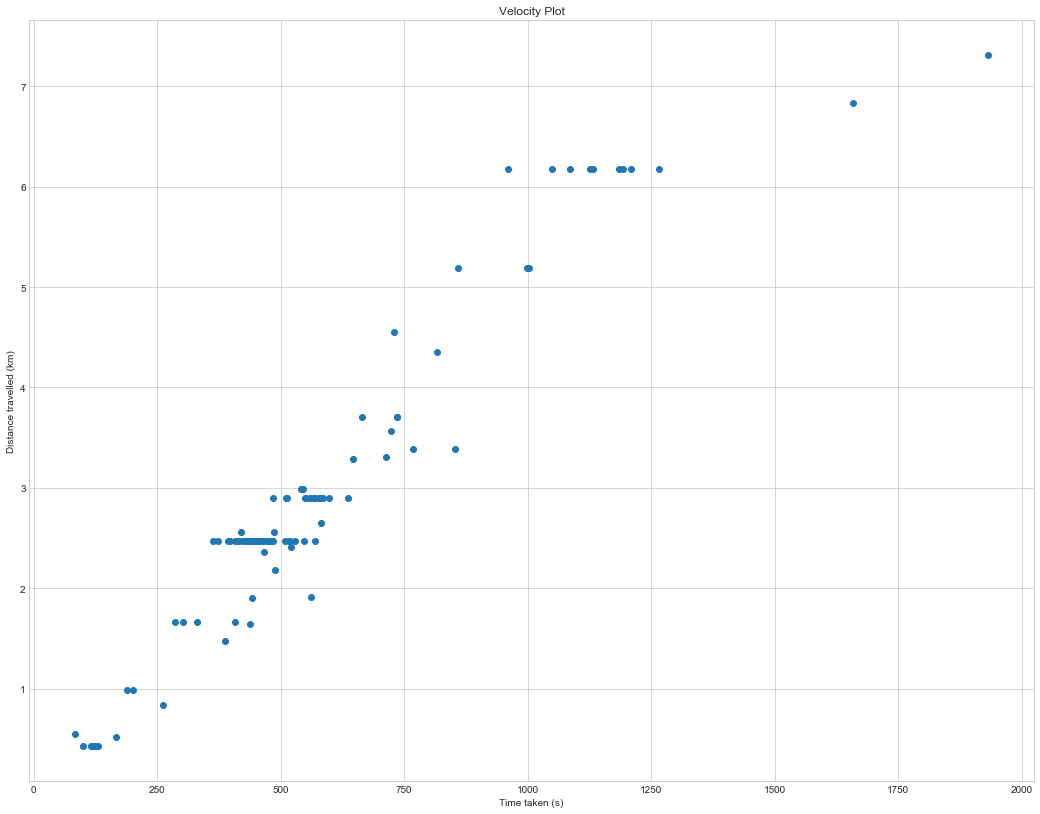

In [15]:
fig, ax = plt.subplots()
my_scatter_plot5 = ax.scatter(
    biking['Time taken (s)'],
    biking['Distance travelled (m)']/1e3
)
ax.set_xlabel('Time taken (s)')
ax.set_ylabel('Distance travelled (km)')
ax.set_title('Velocity Plot')


plt.show()
#A velocity plot, several small plateaus can be seen in this plot, these are excursions presumably to the same location and the varying times taken to get there.
#Towards the end of the plot it looks to be flattening, slowing down at largest distances.
#However, there are too few points at large distances to make a solid prediction on this.

Text(0.5,1,'Velocity Plot')

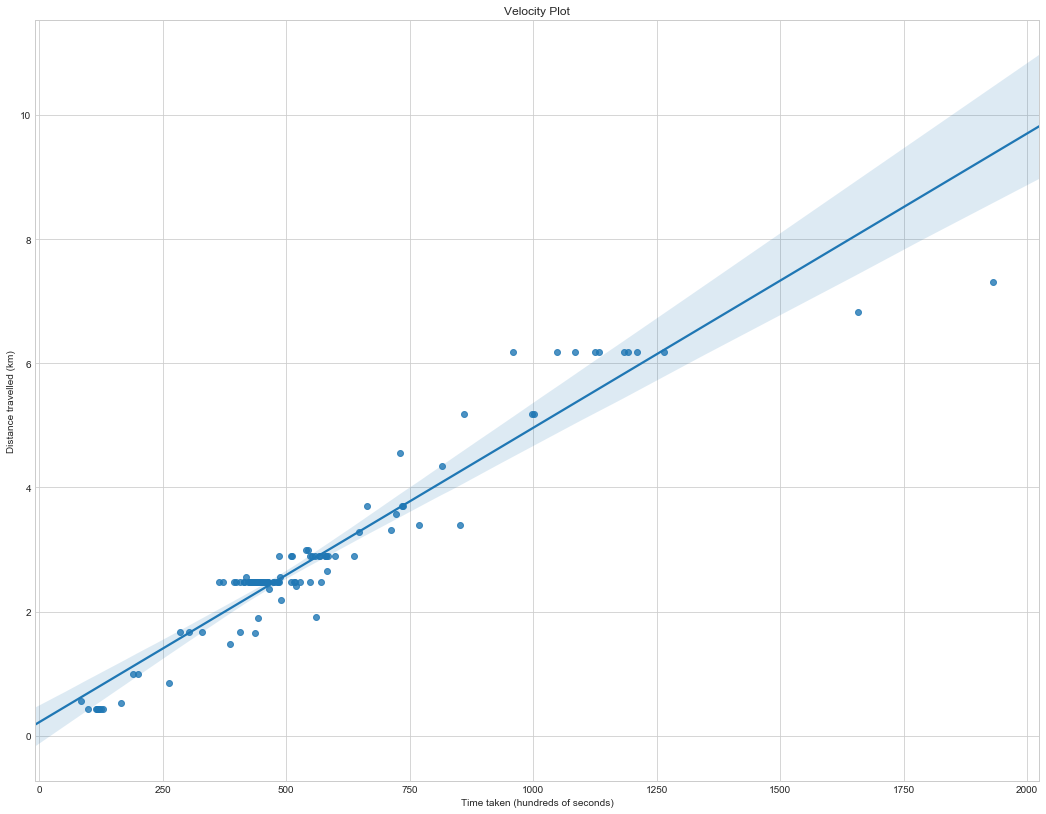

In [10]:
# plotting velocity with a line of best fit and extrapolation

ax = sb.regplot(biking['Time taken (s)'],
    biking['Distance travelled (m)']/1e3)
###Labelling needs to be worked on to be applied

ax.set_xlabel('Time taken (hundreds of seconds)')
ax.set_ylabel('Distance travelled (km)')
ax.set_title('Velocity Plot')

#This is a small scale prediction of how long I might expect to travel certain distances

In [17]:
#for i in range(max(biking['Temperature (°C)']):
 #              biking_i = biking.loc[:, [columns[i]], ]#
#looping through the full temperature range up to 35 degrees and summing the average speeds for each temperature
    
for i in range(35):
    temp = i
    print(biking.loc[biking['Temperature (°C)'] == temp, 'Average speed (m/s)'].sum())
    
    if temp == 36:
        break

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.951218701
20.506242516
14.487358623999999
75.837202936
37.258810835999995
52.964895141
81.84622057499999
82.211111937
45.439186083
24.554383806
14.615960352000002
6.621078037
36.156912166000005
22.174327192
0.0
14.995529432999998
0.0
0.0
0.0


In [18]:
# finding the optimal temperature to cycle in

#a loop is made to pass through all the temperatures up until 35 degrees
#the average speeds for at each temperature are then summed and divided by the 
#number of speed recordings at each temperature to give and average speed per degree
a = biking.loc[biking['Temperature (°C)'] == i, 'Average speed (m/s)'].sum()
b = len(biking.loc[biking['Temperature (°C)'] == i, 'Average speed (m/s)'])
for i in range(36):
    a = biking.loc[biking['Temperature (°C)'] == i, 'Average speed (m/s)'].sum()
    b = len(biking.loc[biking['Temperature (°C)'] == i, 'Average speed (m/s)'])
    print(i, (a/b))
#The "best" temperature for me to travel in is 29° according to this data.

0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 0.0
13 nan
14 0.0
15 0.0
16 1.4216026715714285
17 2.0506242516
18 2.4145597706666666
19 3.7918601468
20 3.7258810835999996
21 3.5309930094
22 4.092311028749999
23 4.835947761
24 4.5439186083
25 4.092397301
26 3.6539900880000005
27 3.3105390185
28 5.1652731665714295
29 5.543581798
30 nan
31 4.998509810999999
32 nan
33 nan
34 0.0
35 4.512061404


C:\Users\Charlie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [20]:
#A loop of the same form is used to pass through all the distances and print the average speed for that distance alongside it
 

a = biking.loc[biking['Distance travelled (m)'] == i, 'Average speed (m/s)'].sum()
b = len(biking.loc[biking['Distance travelled (m)'] == i, 'Average speed (m/s)'])
for i in biking['Distance travelled (m)']:
    a = biking.loc[biking['Distance travelled (m)'] == i, 'Average speed (m/s)'].sum()
    b = len(biking.loc[biking['Distance travelled (m)'] == i, 'Average speed (m/s)'])
    print(i, (a/b))
#print((a/b).max())

#From here the "best" distance for me to travel can be found, the distance that possesses the fastest average - 550m at 6.571m/s

2896.0 5.181932512857143
1669.0 5.12897327525
843.0 3.2200152789999996
2647.0 4.545766787
2469.0 5.516124175333333
519.0 3.1246237210000003
2896.0 5.181932512857143
2469.0 5.516124175333333
2469.0 5.516124175333333
2469.0 5.516124175333333
2469.0 5.516124175333333
2469.0 5.516124175333333
1479.0 3.826649418
2986.0 5.5011957495
2986.0 5.5011957495
3308.0 4.642807018
6176.0 5.4809179776666666
2469.0 5.516124175333333
2469.0 5.516124175333333
2469.0 5.516124175333333
427.0 3.618821763777778
2896.0 5.181932512857143
2469.0 5.516124175333333
2469.0 5.516124175333333
1669.0 5.12897327525
1913.0 3.41180667
3569.0 4.939792388
2469.0 5.516124175333333
2469.0 5.516124175333333
2469.0 5.516124175333333
2469.0 5.516124175333333
2469.0 5.516124175333333
427.0 3.618821763777778
2896.0 5.181932512857143
5187.0 5.469901433333334
6176.0 5.4809179776666666
2469.0 5.516124175333333
2469.0 5.516124175333333
6176.0 5.4809179776666666
4552.0 6.232201533
1669.0 5.12897327525
7308.0 3.782608696
6829.0 4.11782

C:\Users\Charlie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


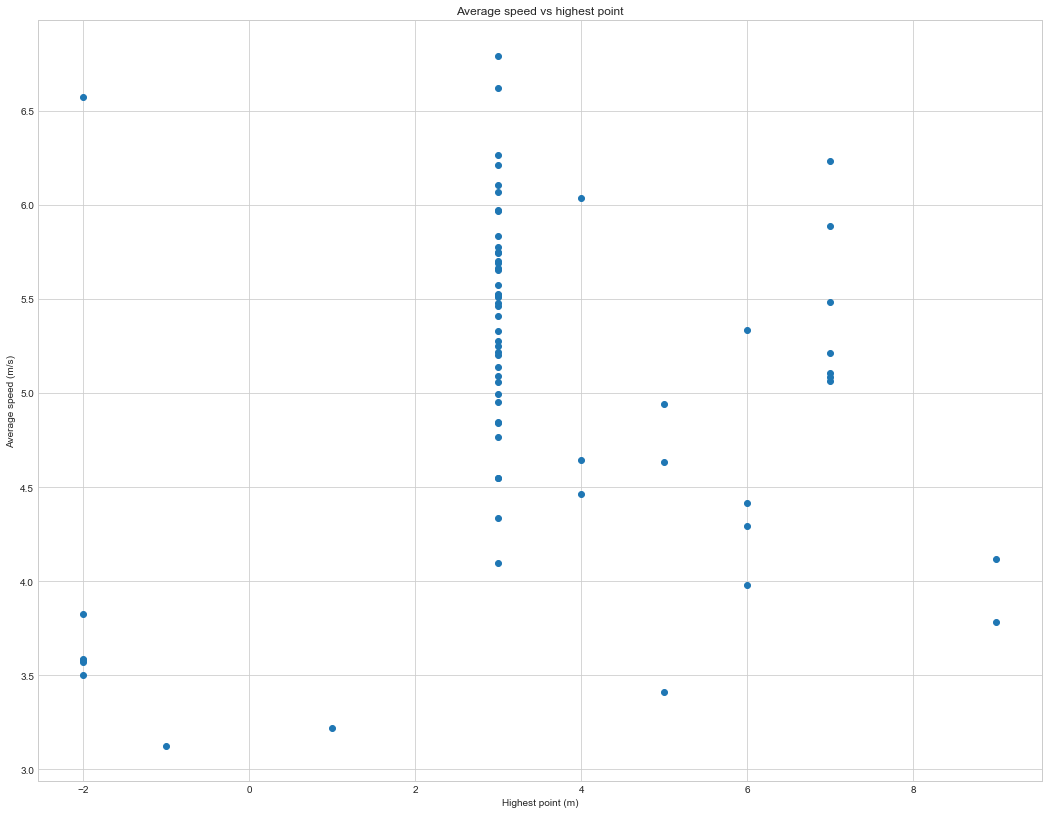

In [16]:
fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(
    biking['Highest point (m)'],
    biking['Average speed (m/s)']
)
ax.set_xlabel("Highest point (m)")
ax.set_ylabel("Average speed (m/s)")
ax.set_title('Average speed vs highest point')


plt.show()

#a plot of the average speed and the highest peak per journey. There doesn't seem to be any particular pattern here

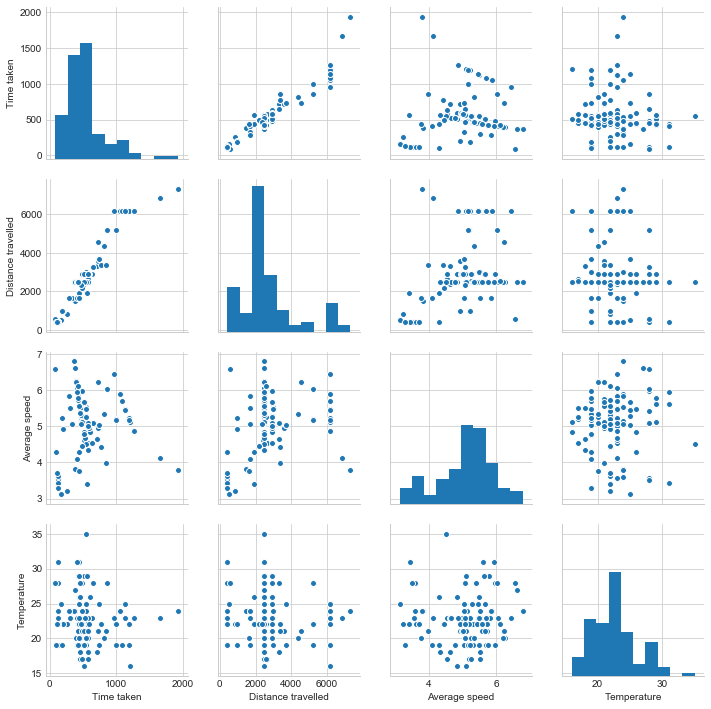

In [32]:
#lister = biking[['Time taken (s)', 'Distance travelled (m)', 'Average speed (m/s)', 'Temperature (°C)', 'Lowest point (m)', 'Highest point (m)', 'Height difference (beginning to end) (m)']]
#sb.pairplot(lister)

##making a pairplot to find those that are normally distributed or not. any Nan vaues have been dropped

biking.columns = ['Date', 'Time taken', 'Time of departure', 'Distance travelled', 'Average speed', 'Temperature','Weather','Lowest point', 'Highest point', 'Height difference']

listy = biking[['Time taken', 'Time of departure', 'Distance travelled', 'Average speed', 'Temperature']]
sb.pairplot(listy.dropna())

In [4]:
#looking for any significant correlation between temperature and average speed

biking_temp = biking['Temperature (°C)'].fillna(biking['Temperature (°C)'].mean())
biking_speed = biking['Average speed (m/s)'].fillna(biking['Average speed (m/s)'].mean())

spearmanr_coefficient, p_value = spearmanr(biking_temp, biking_speed)
print('spearman rank correlation coefficient %0.3f'%(spearmanr_coefficient))

#Noteable positive correlation between temperature and speed.

spearman rank correlation coefficient 0.347


In [5]:
biking_dist = biking['Distance travelled (m)'].fillna(biking['Distance travelled (m)'].mean())
biking_speed = biking['Average speed (m/s)'].fillna(biking['Average speed (m/s)'].mean())

spearmanr_coefficient, p_value = spearmanr(biking_dist, biking_speed)
print('spearman rank correlation coefficient %0.3f' % (spearmanr_coefficient))

#Almost completely uncorrelated between the distance travelled and the speed.

spearman rank correlation coefficient -0.090


In [6]:
biking_time = biking['Time taken (s)'].fillna(biking['Time taken (s)'].mean())
biking_speed = biking['Average speed (m/s)'].fillna(biking['Average speed (m/s)'].mean())

spearmanr_coefficient, p_value = spearmanr(biking_time, biking_speed)
print('spearman rank correlation coefficient %0.3f' % (spearmanr_coefficient))
#Almost completely uncorrelated between the time taken and the speed.

spearman rank correlation coefficient -0.166


In [7]:
biking_hdiff = biking['Height difference (beginning to end) (m)'].fillna(biking['Height difference (beginning to end) (m)'].mean())
biking_speed = biking['Average speed (m/s)'].fillna(biking['Average speed (m/s)'].mean())

spearmanr_coefficient, p_value = spearmanr(biking_hdiff, biking_speed)
print('spearman rank correlation coefficient %0.3f' % (spearmanr_coefficient))
#Small negative correlation between the height difference and the speed.

spearman rank correlation coefficient -0.226


In [8]:
import sys
!{sys.executable} -m pip install nbconvert